# **General Insights on the Input Data**

In [6]:
# Create DataFrame
df_tracks = pd.read_csv('tracks.csv')
df_artists = pd.read_csv('artists.csv')

# **Data Cleaning**

Some processes we will implement
* renaming column names to be more understandable.
* converting units or datatypes to better represent the data.
* convert binary variables from numberical to categorical.

## Convert units of "duration"

In [17]:
# View first 10 rows
df_tracks['duration_ms'][0:10]

,duration_ms
0,126903
1,98200
2,181640
3,176907
4,163080
5,178933
6,134467
7,161427
8,310073
9,181173


In [18]:
# Convert duration from milliseconds to seconds
df_tracks['duration_ms'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))

# Rename duration column
df_tracks.rename(columns = {'duration_ms': 'duration'}, inplace = True)

# View changes (first 10 rows)
df_tracks['duration'][0:10]

,duration
0,127
1,98
2,182
3,177
4,163
5,179
6,134
7,161
8,310
9,181


## Convert data type of "explicit"

In [19]:
# View the first 10 rows of explicit column
df_tracks['explicit'][0:10]

,explicit
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [20]:
# Change from numeric to boolean datatype
df_tracks['explicit'] = df_tracks['explicit'].astype(bool)

In [21]:
# View changes
df_tracks['explicit'][0:10]

,explicit
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


## Clean "artists" names

In [22]:
# View the first 10 rows of artists column
df_tracks['artists'][0:10]

,artists
0,['Uli']
1,['Fernando Pessoa']
2,['Ignacio Corsini']
3,['Ignacio Corsini']
4,['Dick Haymes']
5,['Dick Haymes']
6,['Francis Marty']
7,['Mistinguett']
8,['Greg Fieler']
9,['Ignacio Corsini']


In [23]:
# Extract the actual artist names and remove the square brackets and quotes
df_tracks['artists'] = df_tracks['artists'].str.strip("[]").str.replace("'", "")

In [24]:
# View changes to artists column
df_tracks['artists'][0:10]

,artists
0,Uli
1,Fernando Pessoa
2,Ignacio Corsini
3,Ignacio Corsini
4,Dick Haymes
5,Dick Haymes
6,Francis Marty
7,Mistinguett
8,Greg Fieler
9,Ignacio Corsini


## Convert data type of "release_date"

In [25]:
# View the first 10 rows of release_date column
df_tracks['release_date'][0:10]

,release_date
0,1922-02-22
1,1922-06-01
2,1922-03-21
3,1922-03-21
4,1922
5,1922
6,1922
7,1922
8,1922
9,1922-03-29


# **Data Analysis - Continued**

## Top 15 Most Popular Songs

In [43]:
# Create a copy of the DataFrame
df_sorted = df_tracks.copy()

# Sort the copied DataFrame by popularity from highest to lowest
df_sorted = df_sorted.sort_values(by='popularity', ascending=False)

# Print first 5 rows to test
df_sorted.head(5)

,id,name,popularity,duration,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198,True,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242,True,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,133,False,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,216,True,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160,False,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2020


In [46]:
# Generate the Top 15 most popular songs
top_songs = df_sorted.head(15)
top_songs

,id,name,popularity,duration,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198,True,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242,True,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,133,False,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,216,True,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160,False,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242,False,"Bruno Mars, Anderson .Paak, Silk Sonic","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200,False,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164,False,Tiësto,['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,...,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198,False,Giveon,['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,...,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,2020
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,233,False,"Myke Towers, Juhn","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,...,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4,2020


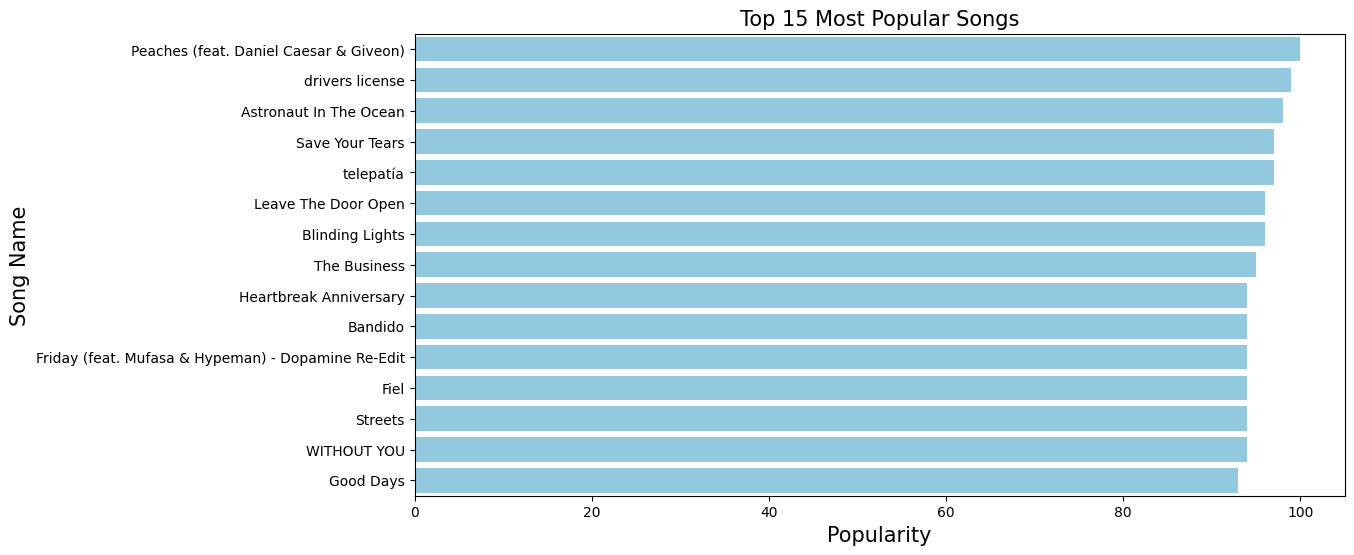

In [45]:
# Plot the top 15 songs on a bar graph
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.barplot(y= top_songs['name'], x = top_songs['popularity'], color='skyblue')
ax.set_xlabel("Popularity", fontsize = 15)
ax.set_ylabel("Song Name", fontsize = 15)
ax.set_title("Top 15 Most Popular Songs", fontsize = 15)
plt.show()

## Further Insights into the Top 15 Songs

<ipython-input-44-ed0090244b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y=column, data=top_songs, palette='Set2')
<ipython-input-44-ed0090244b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y=column, data=top_songs, palette='Set2')
<ipython-input-44-ed0090244b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y=column, data=top_songs, palette='Set2')
<ipython-input-44-ed0090244b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

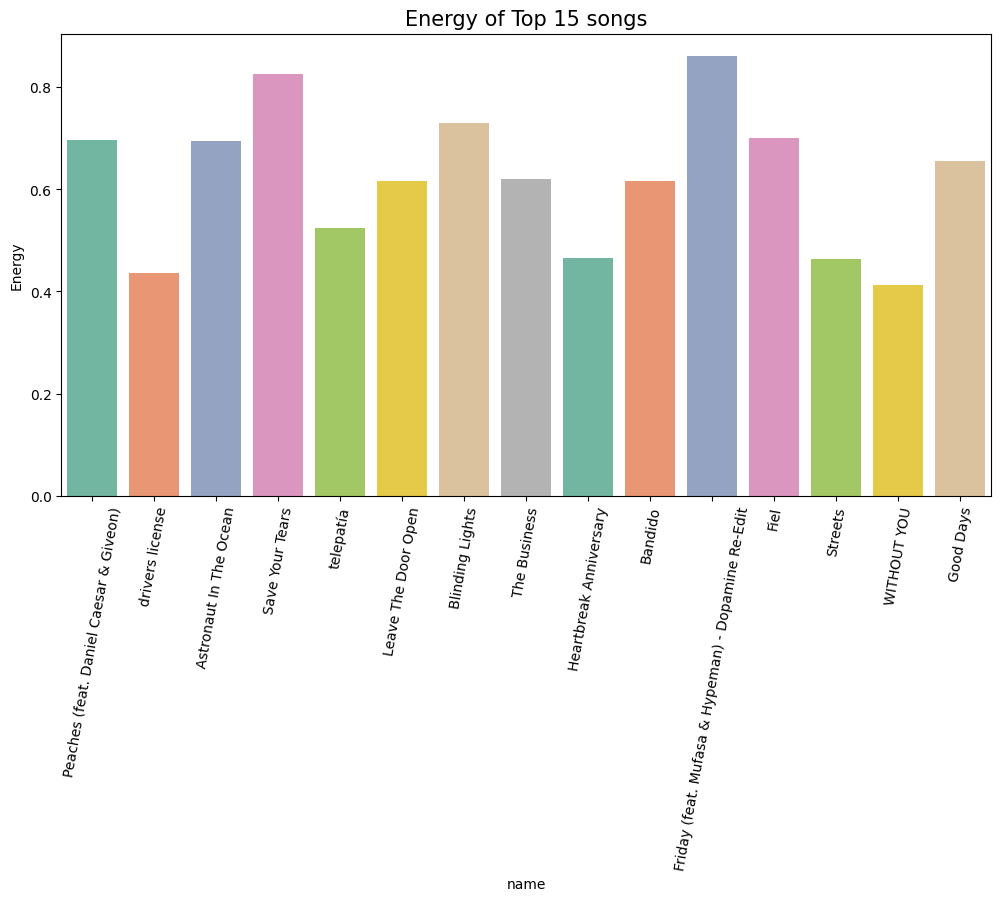

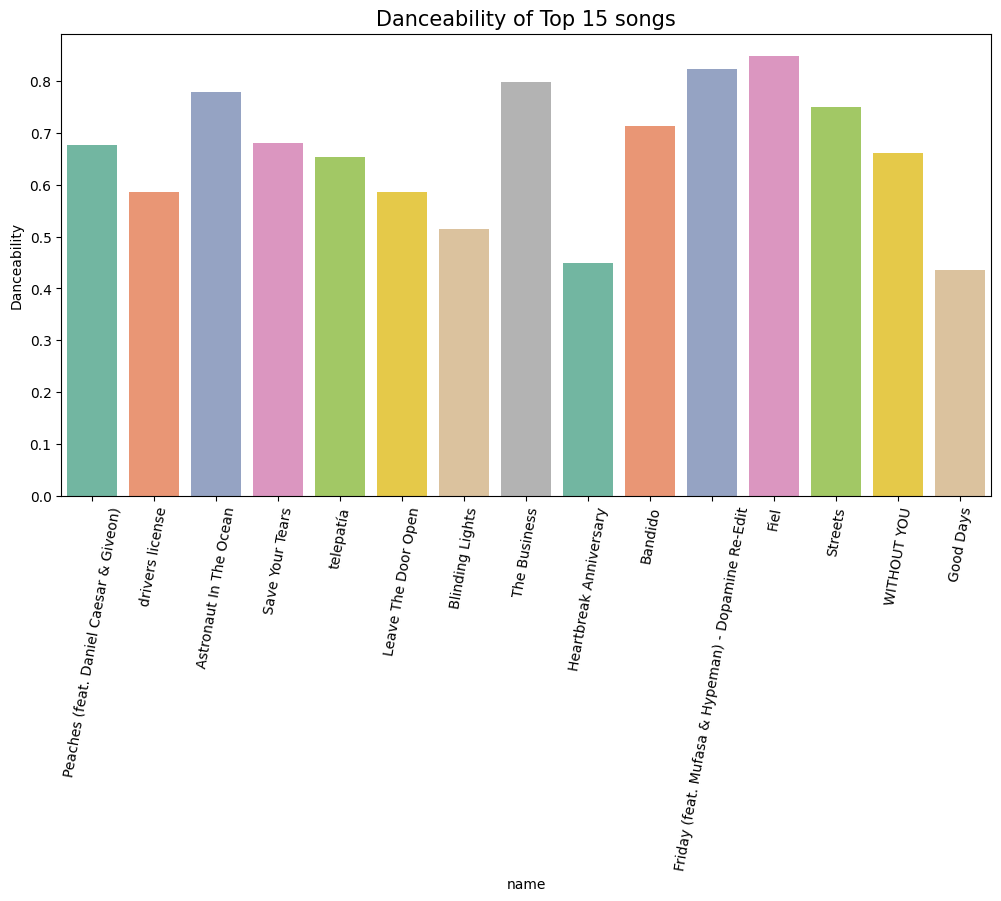

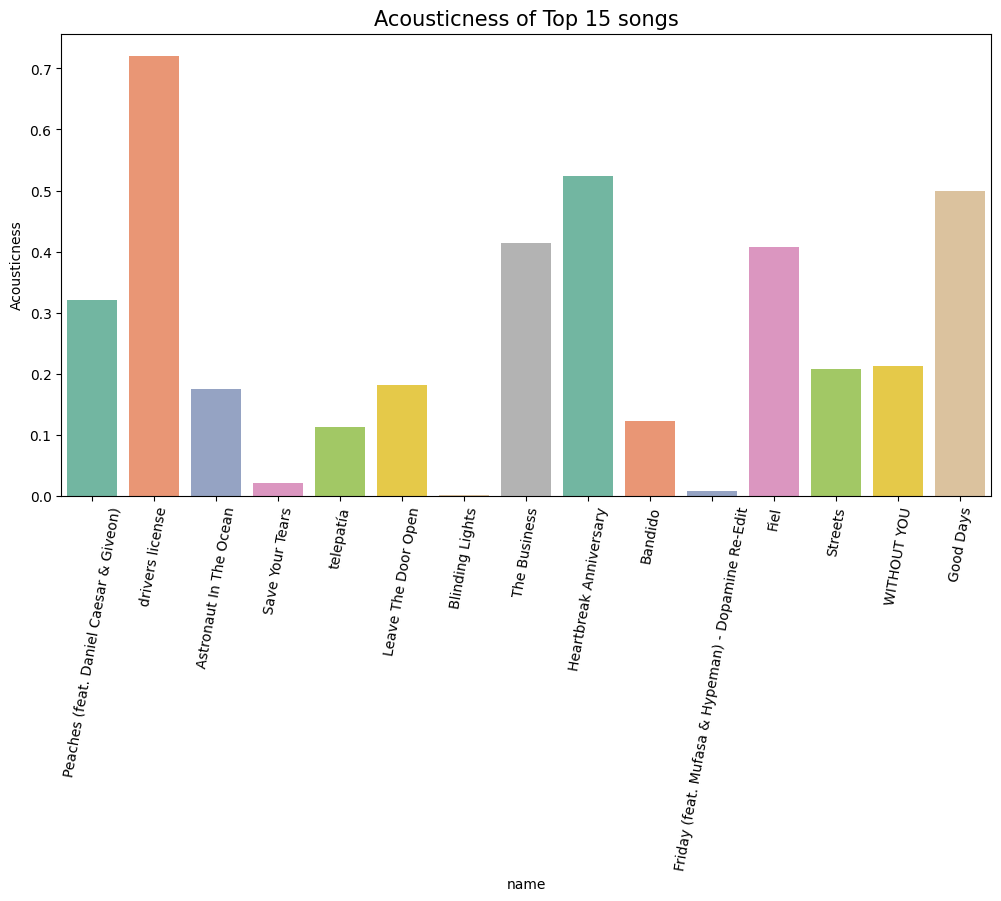

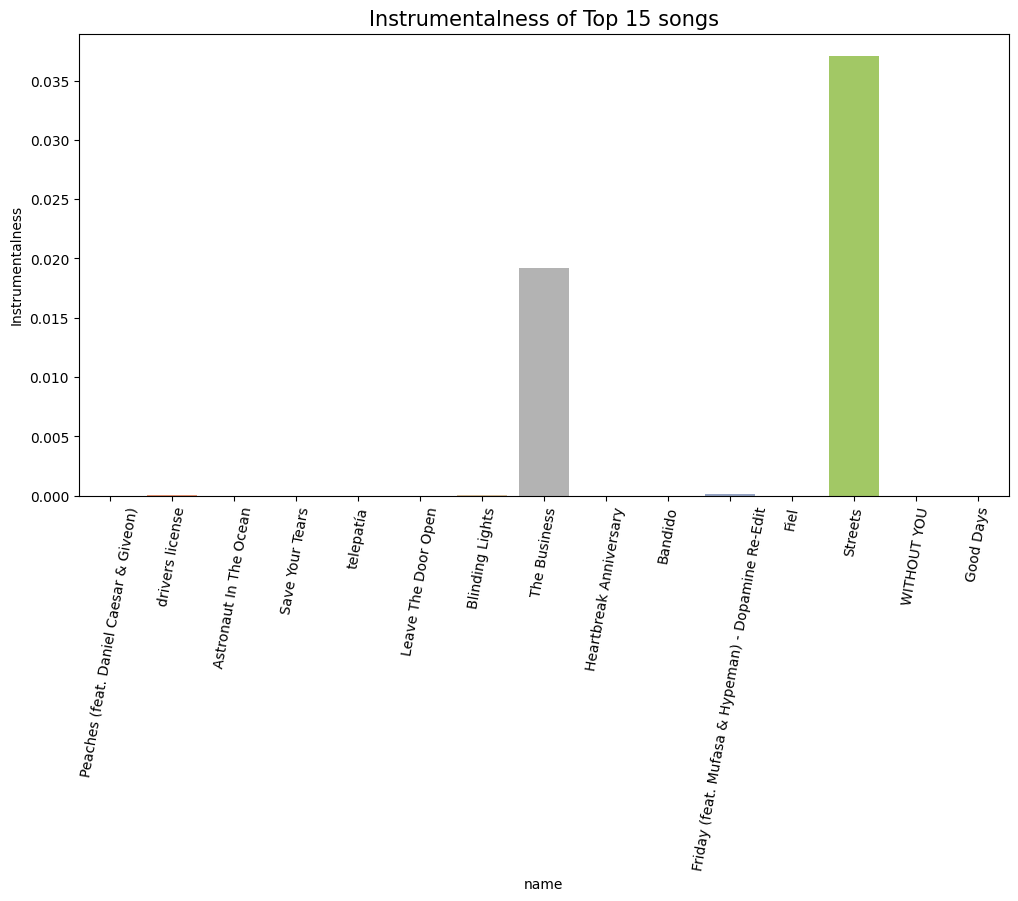

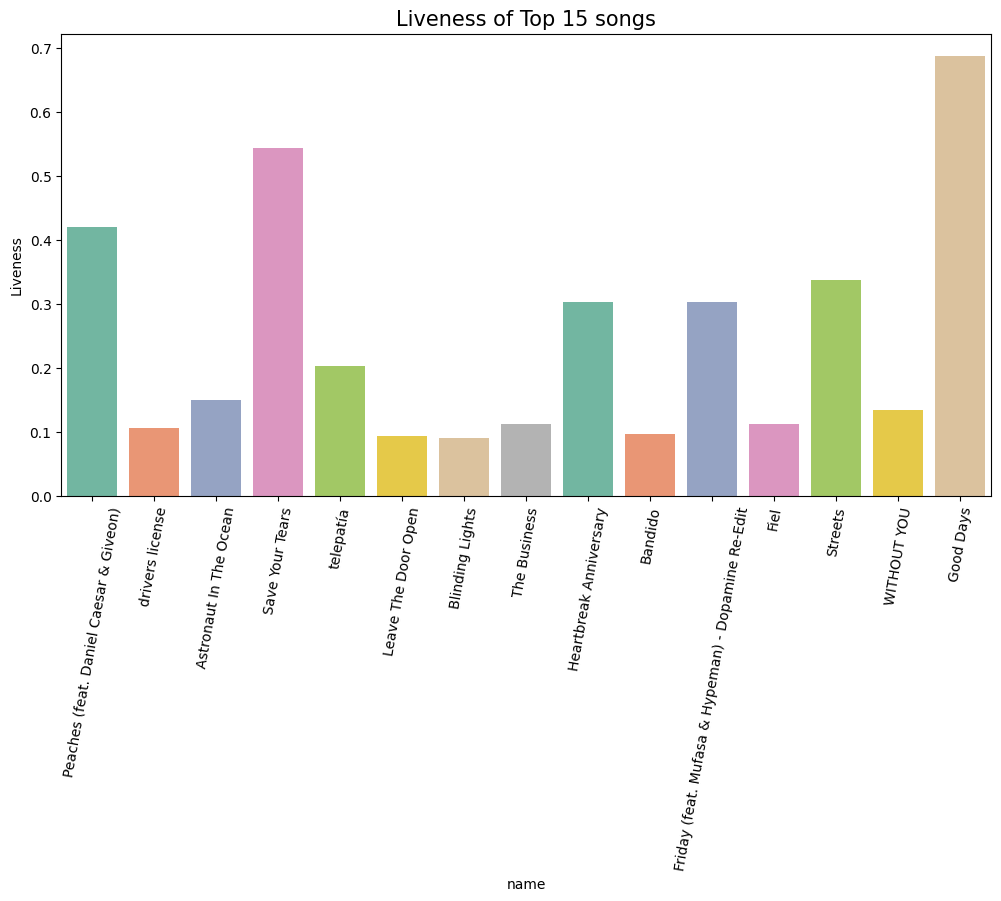

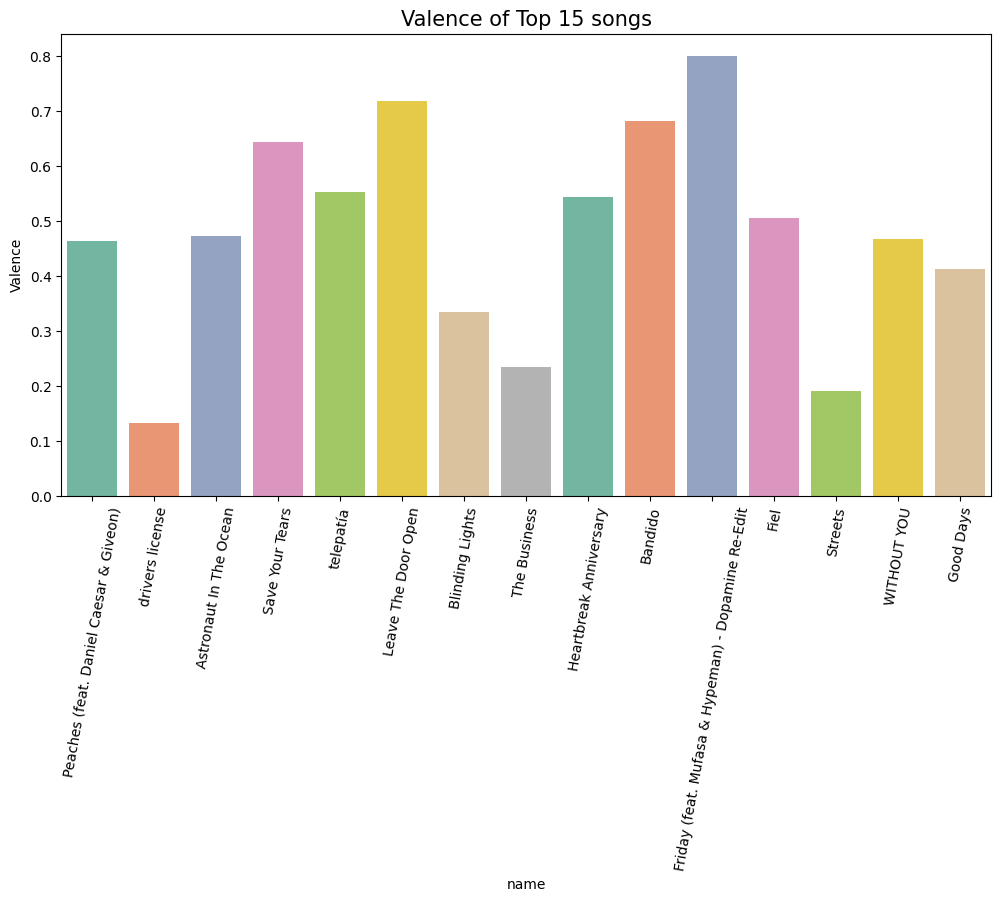

In [44]:
# Specify our variables of interest
columns_to_plot = ['energy', 'danceability', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Iterate through each variable, plot these measures for the top 15 songs
for i, column in enumerate(columns_to_plot):
    fig, ax = plt.subplots(figsize = (12, 6))
    ax = sns.barplot(x='name', y=column, data=top_songs, palette='Set2')
    plt.title(f'{column.capitalize()} of Top 15 songs',  c = 'black', fontsize=15)
    plt.xticks(rotation=80)
    plt.ylabel(column.capitalize())
plt.show()

What we discovered about the Top 15 songs:
* They have higher energy and danceability; lower acousticness and instrumentalness.
* Various levels of valence (both happy and sad are equally popular).

## Top 10 Most Danceable Songs

In [47]:
# Create DataFrame for tracks sorted by danceability from highest to lowest
most_dance = df_tracks.sort_values(by = 'danceability', ascending = False).head(10)
most_dance

,id,name,popularity,duration,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
418558,4tq7Q9bTkLqzXNUi8PVmk2,Puisorul cafeniu,15,85,False,Malina Olinescu,['6KZH1ER38F5smKpXKmLRwb'],2002-01-01,0.991,0.422,...,-11.093,1,0.2470,0.307000,0.017600,0.0788,0.994,119.975,4,2002
156664,5ObMLQkrprMky3fuOCnFmW,Who Loves The Sun feat. Jo.Ke - Edit,53,257,False,"Nu, Jo.Ke","['5tY2sa8I11tpMuhU9onQ6e', '0RKP3F2s1SHvGpckHu...",2011-07-12,0.988,0.644,...,-10.245,0,0.0720,0.118000,0.462000,0.2440,0.499,120.003,4,2011
252256,7yCtSls77Pnz8R4etGfHe5,Tío Mario,11,102,False,Susana Bosch,['7FSDwf9FSxPM0TnnbuBRUi'],1998-07-01,0.988,0.459,...,-6.631,1,0.1300,0.124000,0.000000,0.0749,0.930,114.849,4,1998
62569,5YIF6HSOtHN9HdcE5IPzMe,Funky Cold Medina,58,248,False,Tone-Loc,['5Y8EphH8Vdqu5SLj6K5vjj'],1989-01-01,0.988,0.633,...,-15.012,0,0.0888,0.075500,0.000002,0.0668,0.929,117.493,4,1989
356102,5GFwJHucflHj46Hwet6qvc,Cool - Leonardo La Mark Remix,0,362,False,"Spooner Street, Rio Dela Duna, Leonardo La Mark","['69Jnii2nKzGXwTz2CNR82H', '5McLuoTfnILw7AYs1I...",2021-01-15,0.987,0.649,...,-6.727,1,0.2770,0.000626,0.379000,0.0686,0.458,122.002,4,2021
74928,6G7Gtq7ymFvYuqcJSAW9cA,New Year (2021),0,42,False,"xxrichbeats, Egor4ik","['49FLHDHX5mD9Pbm6JwLujJ', '01KisSmrh9sNoIzqT6...",2021-01-20,0.987,0.293,...,-11.453,0,0.1990,0.003210,0.000010,0.1280,0.502,119.974,4,2021
175899,1HTN2lX8X87qmMXTtI9FDL,Go Girl,54,230,True,"Pitbull, Trina, Young Bo","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-29,0.986,0.597,...,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4,2012
509977,3jjfgpQ05jy0hoGwdaVmzH,BABÁM,40,194,False,"Horváth Tamás, Pixa","['4I1y8Rd0H2NGXMzmT6JWsz', '6YbKlFrkjKLYpC3PYy...",2020-06-10,0.986,0.323,...,-6.965,0,0.1070,0.018900,0.000284,0.0857,0.708,121.958,4,2020
303940,1MgM0WDaoQ2A3bnIQTR6ty,Go Girl,55,230,True,"Pitbull, Trina, Young Bo","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-08,0.986,0.597,...,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4,2012
56990,1JLU51CdgQhWWWokxrbOPM,Como uma onda - Zen-surfismo,45,201,False,Lulu Santos,['0A1oy7PC7fdzURgaLaWkL1'],1983-10-20,0.985,0.379,...,-11.910,0,0.1080,0.161000,0.895000,0.0983,0.889,116.477,4,1983


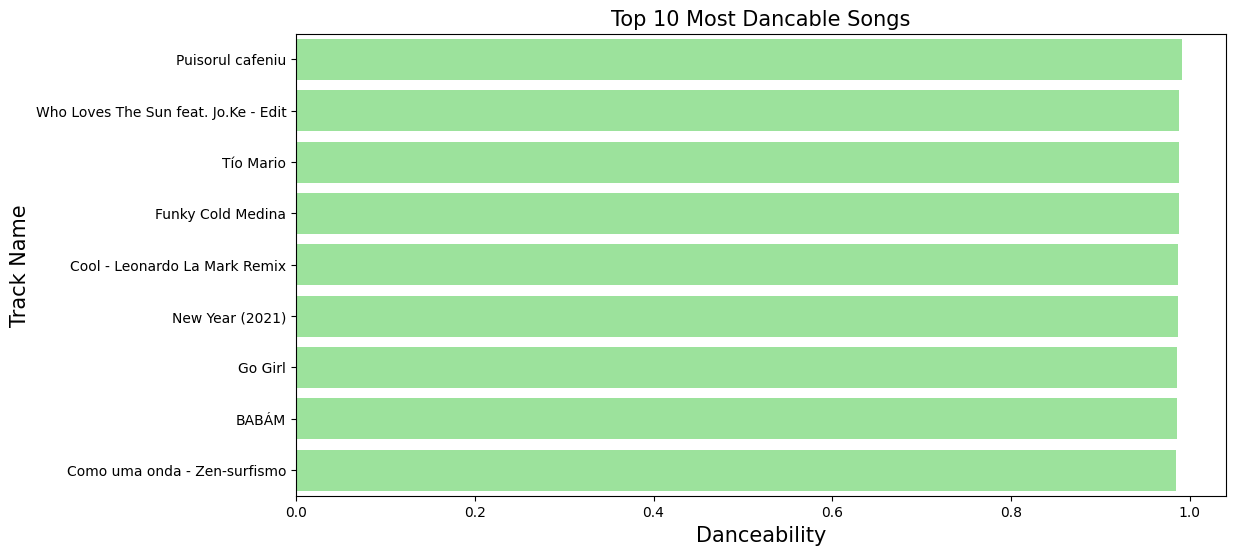

In [48]:
# Plot the Top 10 most danceable songs
plt.figure(figsize = (12, 6))
sns.barplot(y = most_dance['name'], x = most_dance['danceability'], color = 'lightgreen')
plt.ylabel('Track Name', fontsize = 15)
plt.xlabel('Danceability', fontsize = 15)
plt.title("Top 10 Most Dancable Songs", fontsize = 15)
plt.show()

This is only one example of how we can get information on the Top/Bottom of any categorical feature.

By modifying the code slightly, we can easily obtain other anlysis and visualizations such as "Top 10 Most Acoustic," "Bottom 10 Least Energetic," etc.

# Historgrams: Distributions of Dataset


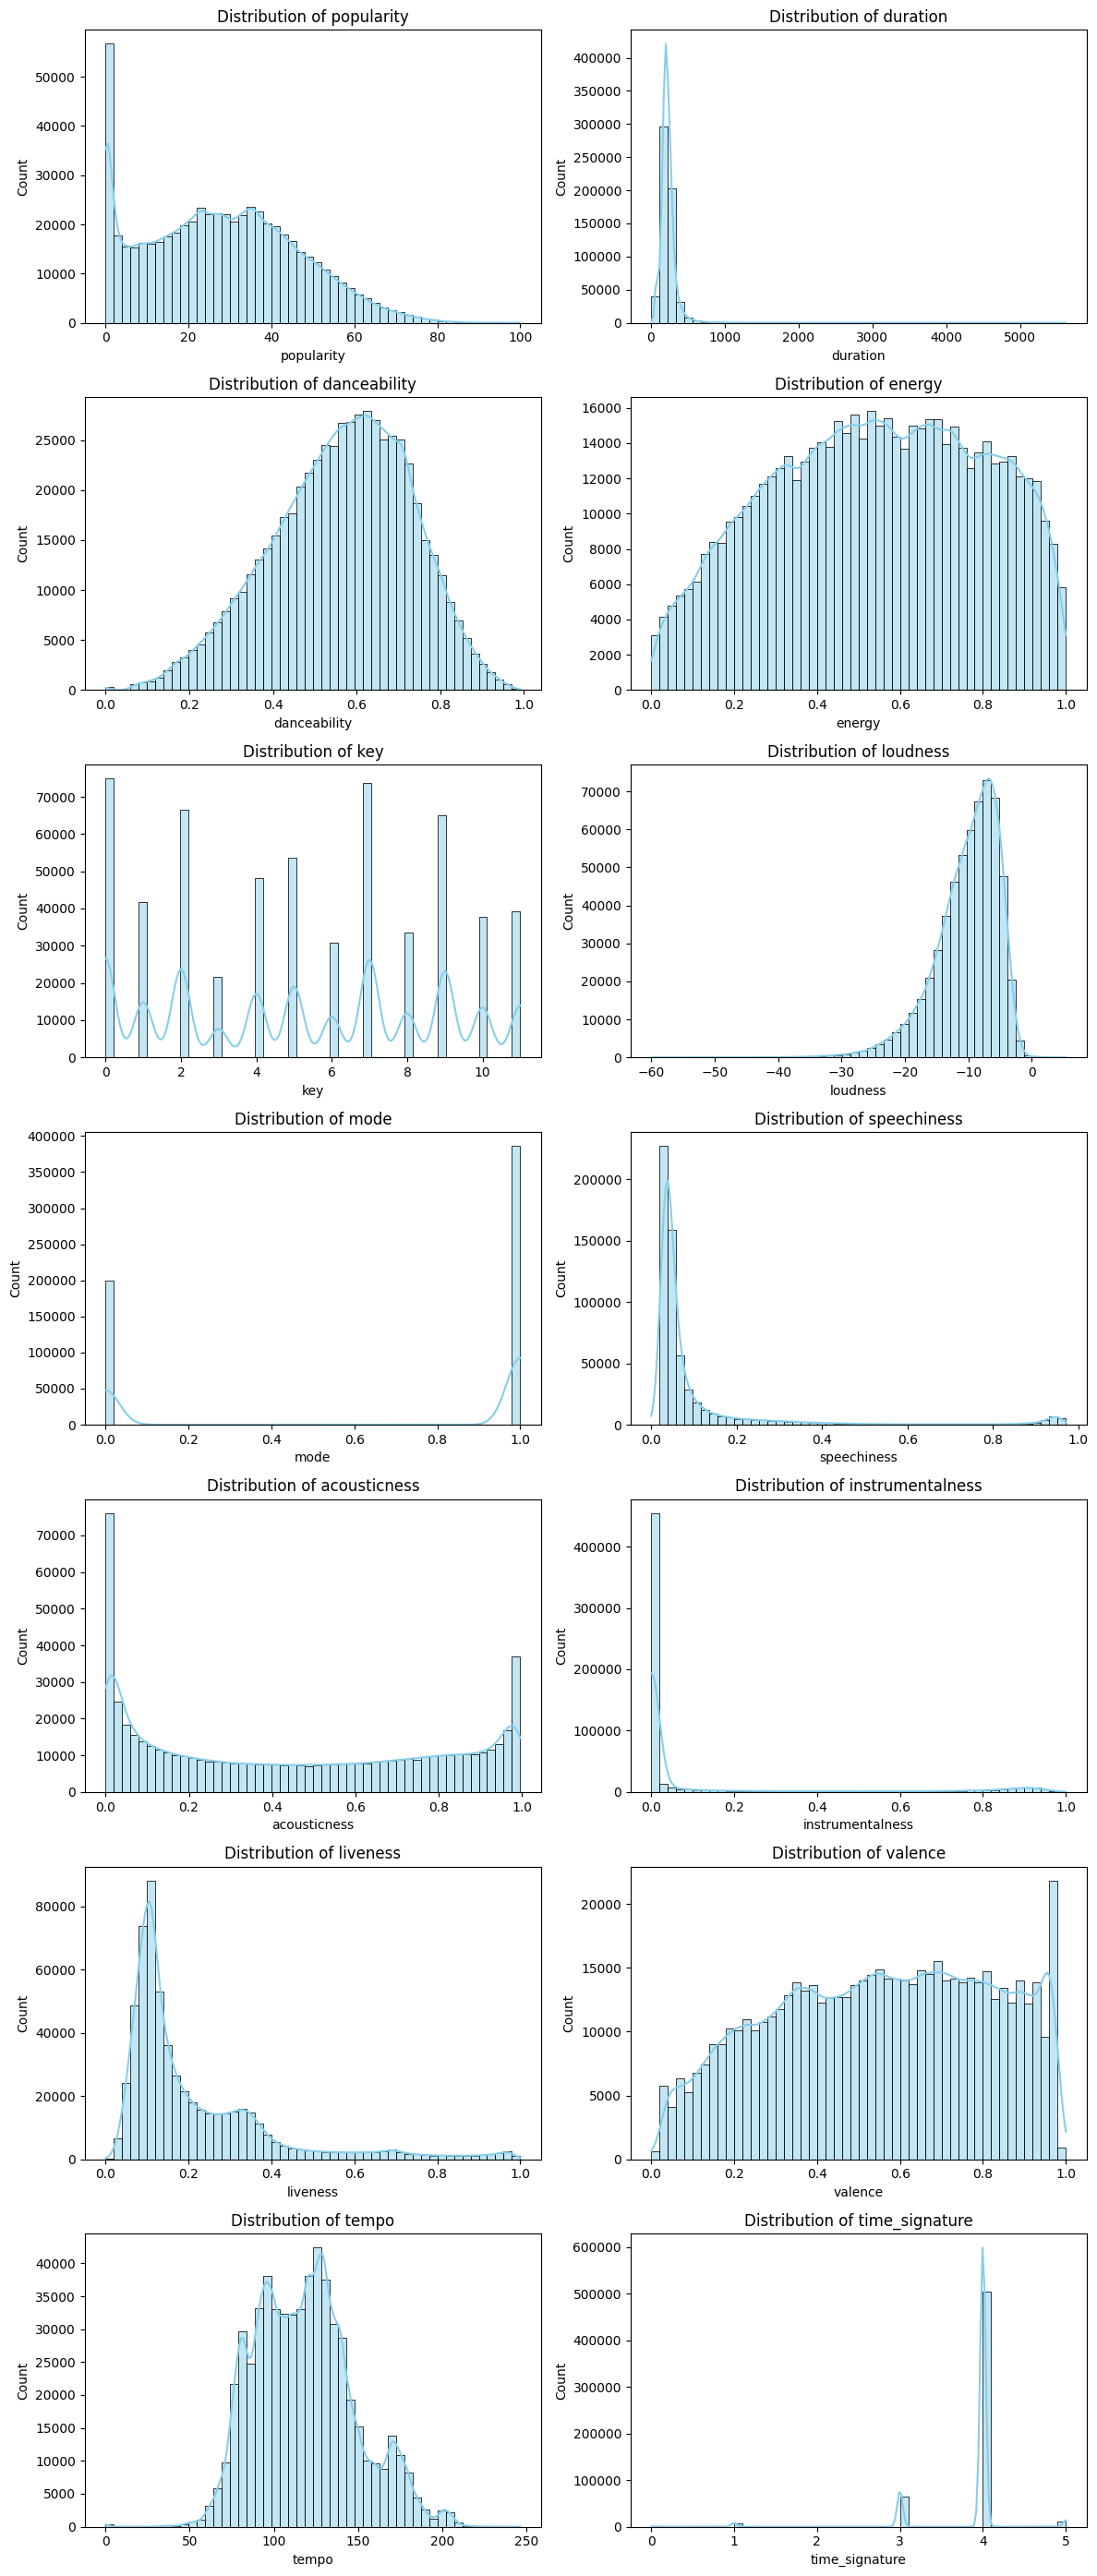

In [49]:
# Create new DataFrame for numeric columns
numeric_columns = df_tracks.select_dtypes(include=['float64', 'int64']).columns

# Setting up subplots with dynamic rows based on the number of numeric columns
num_rows = (len(numeric_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

# Flatten the 2D array of axes into a 1D array
# This makes it easier to iterate over them in the upcoming loop
axes = axes.flatten()

# Plotting histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df_tracks[column], bins=50, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation Heatmap

In [50]:
# Create a DataFrame that gives correlation between numeric variables
corr_df = df_tracks.drop(['key', 'mode', 'explicit'], axis = 1).corr(method = 'pearson', numeric_only=True)
corr_df

,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
popularity,1.000000,0.027683,0.187000,0.302315,0.327028,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759,0.590921
duration,0.027683,1.000000,-0.120368,0.024828,0.000345,-0.125770,-0.064435,0.069271,0.002138,-0.163200,-0.001210,0.037554,0.054147
danceability,0.187000,-0.120368,1.000000,0.241563,0.251436,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196,0.226748
energy,0.302315,0.024828,0.241563,1.000000,0.764735,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983,0.460264
loudness,0.327028,0.000345,0.251436,0.764735,1.000000,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377,0.447037
speechiness,-0.047357,-0.125770,0.199310,-0.053506,-0.167112,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171,-0.081898
acousticness,-0.370882,-0.064435,-0.242951,-0.715412,-0.519423,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927,-0.527581
instrumentalness,-0.236487,0.069271,-0.225900,-0.195839,-0.329306,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257,-0.222010
liveness,-0.048740,0.002138,-0.106168,0.124632,0.029529,0.207047,-0.004738,-0.038848,1.000000,-0.000034,-0.014912,-0.024202,-0.021015
valence,0.004643,-0.163200,0.528150,0.372276,0.275448,0.046501,-0.180939,-0.175226,-0.000034,1.000000,0.135250,0.105529,-0.024695


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'year')]

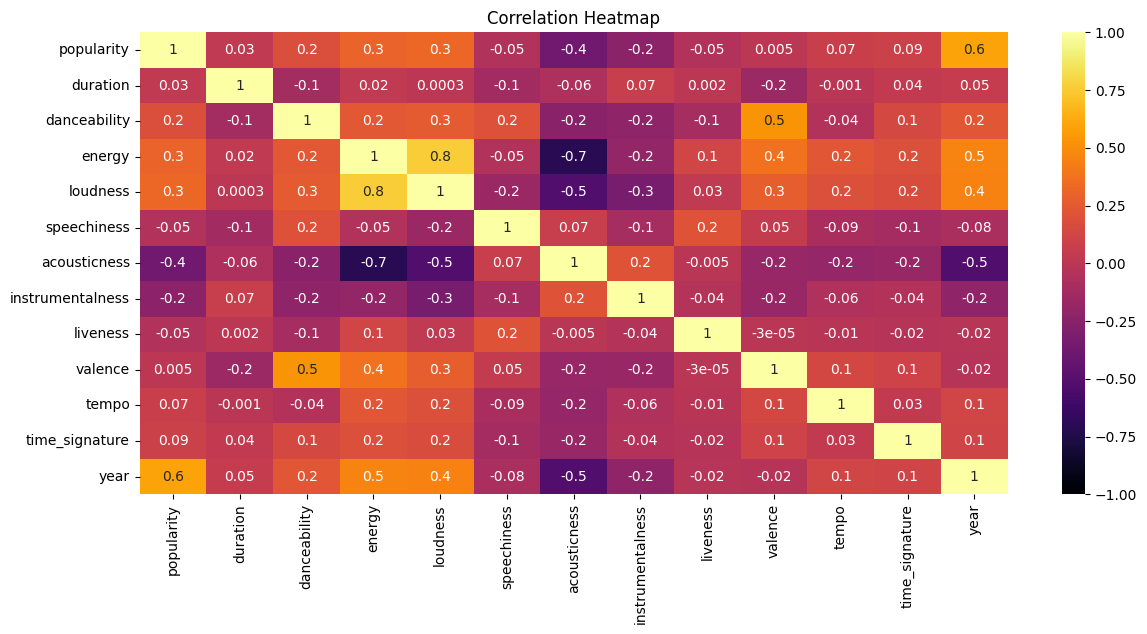

In [51]:
# Plot correlation heatmap to better visualize how various numeric variables may relate to each other
plt.figure(figsize = (14, 6))
ax = sns.heatmap(corr_df, annot = True, fmt=".1g", vmin = -1, vmax = 1, center = 0, cmap='inferno', linecolor='Black')
plt.title("Correlation Heatmap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Correlation Analysis
* lighter colors are more positive correlated (ex: loudness is positively correlated with energy)
* darker colors are more negatively correlated (ex: energy is negatively correlated with acousticness)
* Take a look at the first column to see how different song attributes may affect popularity

Take a sample of all the tracks to perform correlation analysis. This helps the efficiency of the code.

In [52]:
sample_df = df_tracks.sample(int(0.004 * len(df_tracks)))
len(sample_df)

2346

## Loudness vs. Energy

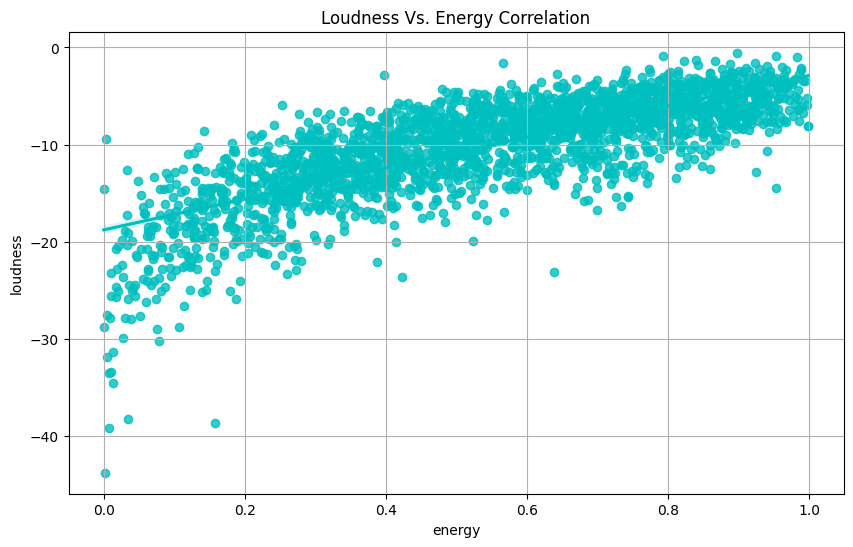

In [53]:
# Regression plot for loudness vs energy
plt.figure(figsize = (10, 6))
sns.regplot(data = sample_df, y = "loudness", x = 'energy', color = 'c').set(title = "Loudness Vs. Energy Correlation")
plt.grid()
plt.show()

We can use correlation maps to do some comparisons that may reveal data-insights that can help with strategizing toward business goals.

# Number of songs released per year

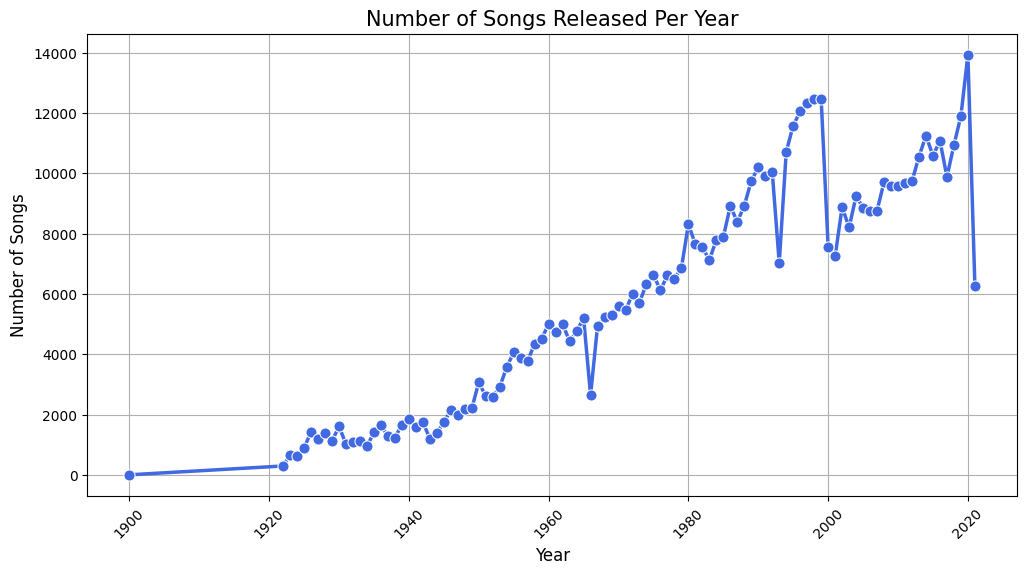

In [54]:
# Convert release_date to datetime
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'])

# Extract the year from the release_date
df_tracks['year'] = df_tracks['release_date'].dt.year

# Count the number of songs released each year
songs_per_year = df_tracks['year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=songs_per_year.index,
    y=songs_per_year.values,
    marker='o',
    color='royalblue',
    linewidth=2.5,
    markersize=8,
)
plt.title('Number of Songs Released Per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Lineplots are helpful to see how certain measurement change over time.

Insights:
* There is generally a gradual increase of song releases over time
* A larger increase of releases in the 1990s
* A spike in 2020, can be further analyzed in market research as to why this is the case